### Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [2]:
dataframe_tips = sns.load_dataset('tips')

In [3]:
dataframe_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
dataframe_tips.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Features

In [5]:
dataframe_tips['net_bill'] = dataframe_tips['total_bill'] - dataframe_tips['tip']
dataframe_tips['tip_percentage'] = dataframe_tips['tip'] / dataframe_tips['net_bill']

In [6]:
dataframe_tips.describe()

,total_bill,tip,size,net_bill,tip_percentage
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.787664,0.202123
std,8.902412,1.383638,0.951100,8.032459,0.163385
min,3.070000,1.000000,1.000000,2.070000,0.036955
25%,13.347500,2.000000,2.000000,11.000000,0.148274
50%,17.795000,2.900000,2.000000,14.555000,0.183110
75%,24.127500,3.562500,3.000000,20.685000,0.236821
max,50.810000,10.000000,6.000000,43.170000,2.452381


In [7]:
dataframe_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886


### Tip

#### Weighted mean

In [8]:
tip_values = round(number = dataframe_tips['tip'], ndigits = 1)

dataframe_tips['r_tip'] = tip_values

tip_values = tip_values.value_counts()

tip_values_max_freq = tip_values.values.max()

lim = 0.3

tip_values = tip_values.loc[tip_values.div(other = tip_values_max_freq) >= lim]

tip_weight_mean = sum(tip_values.index * tip_values.values) / sum(tip_values.values)
tip_weight_mean = round(number = tip_weight_mean, ndigits = 2)

tip_values, tip_weight_mean

(tip
 2.0    42
 3.0    24
 3.5    13
 2.5    13
 Name: count, dtype: int64,
 np.float64(2.54))

#### Fences

In [9]:
q1 = dataframe_tips['tip'].quantile(q=0.25)
q3 = dataframe_tips['tip'].quantile(q=0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

#### Outlier (IQR Method)

In [10]:
dataframe_tips['outlier_tip'] = False
dataframe_tips.loc[
    dataframe_tips[
        (dataframe_tips['tip'] < lower_limit) | (dataframe_tips['tip'] > upper_limit)
    ].index,
    'outlier_tip'] = True

# dataframe_tips['outlier_tip'] = True
# dataframe_tips.loc[
#     dataframe_tips[
#         (dataframe_tips['tip'] >= lower_limit) & (dataframe_tips['tip'] <= upper_limit)
#     ].index,
#     'outlier_tip'] = False

#### Outlier (IQR Method) em net_bill

In [11]:
# q1 = dataframe_tips['net_bill'].quantile(q=0.25)
# q3 = dataframe_tips['net_bill'].quantile(q=0.75)
# iqr = q3 - q1

# lower_limit = q1 - 1.5 * iqr
# upper_limit = q3 + 1.5 * iqr

# dataframe_tips.loc[
#     dataframe_tips[
#         (dataframe_tips['net_bill'] < lower_limit) | (dataframe_tips['net_bill'] > upper_limit)
#     ].index,
#     'outlier_tip'] = True

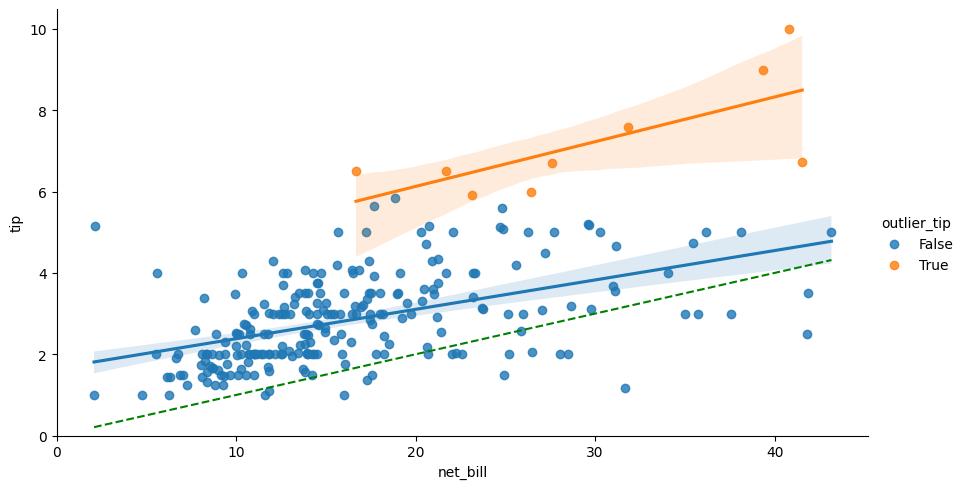

In [12]:
# scatter (net_bill x tip) with regression line
sns.lmplot(x='net_bill', y='tip', data=dataframe_tips, hue='outlier_tip', legend=True, aspect=1.778)

# sns.regplot(x='net_bill', y='tip', data=dataframe_tips, scatter=False)
# sns.scatterplot(x='net_bill', y='tip', data=dataframe_tips, hue='outlier')

# 10% line
x = np.linspace(start=dataframe_tips['net_bill'].min(), stop=dataframe_tips['net_bill'].max(), num=100)
y_10_pct = x * 0.1

plt.plot(x, y_10_pct, '--g')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

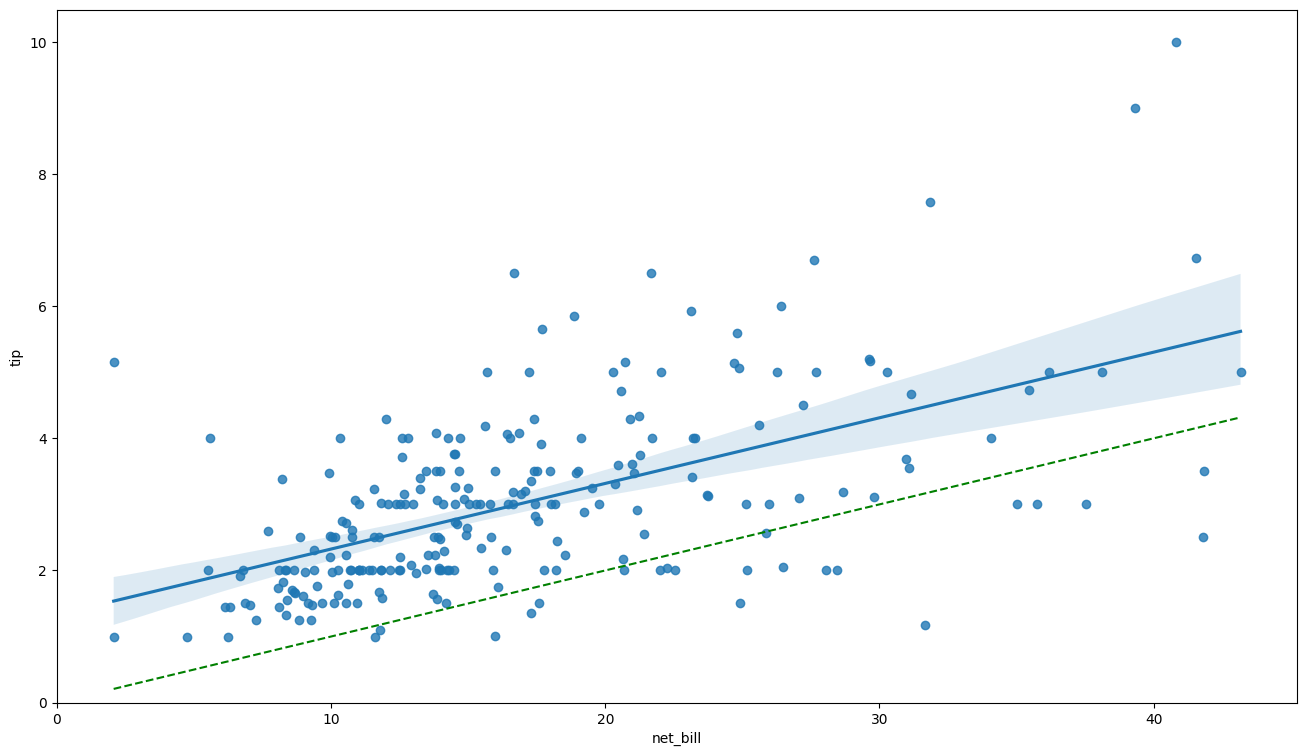

In [13]:
plt.figure(figsize=(16,9))

# scatter (net_bill x tip) with regression line
sns.regplot(x='net_bill', y='tip', data=dataframe_tips)

# 10% line
x = np.linspace(start=dataframe_tips['net_bill'].min(), stop=dataframe_tips['net_bill'].max(), num=100)
y_10_pct = x * 0.1

plt.plot(x, y_10_pct, '--g')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# normalize
dataframe_tips['tip_standard'] = scaler.fit_transform(dataframe_tips[['tip']])
dataframe_tips['net_bill_standard'] = scaler.fit_transform(dataframe_tips[['net_bill']])

# norma
dataframe_tips['norma_l2'] = (dataframe_tips['tip_standard'] ** 2 + dataframe_tips['net_bill_standard'] ** 2) ** (1/2)

# fences
q1 = dataframe_tips['norma_l2'].quantile(q=0.25)
q3 = dataframe_tips['norma_l2'].quantile(q=0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# outlier
dataframe_tips['outlier_norma_l2'] = False
dataframe_tips.loc[
    dataframe_tips[
        (dataframe_tips['norma_l2'] < lower_limit) | (dataframe_tips['norma_l2'] > upper_limit)
    ].index,
    'outlier_norma_l2'] = True

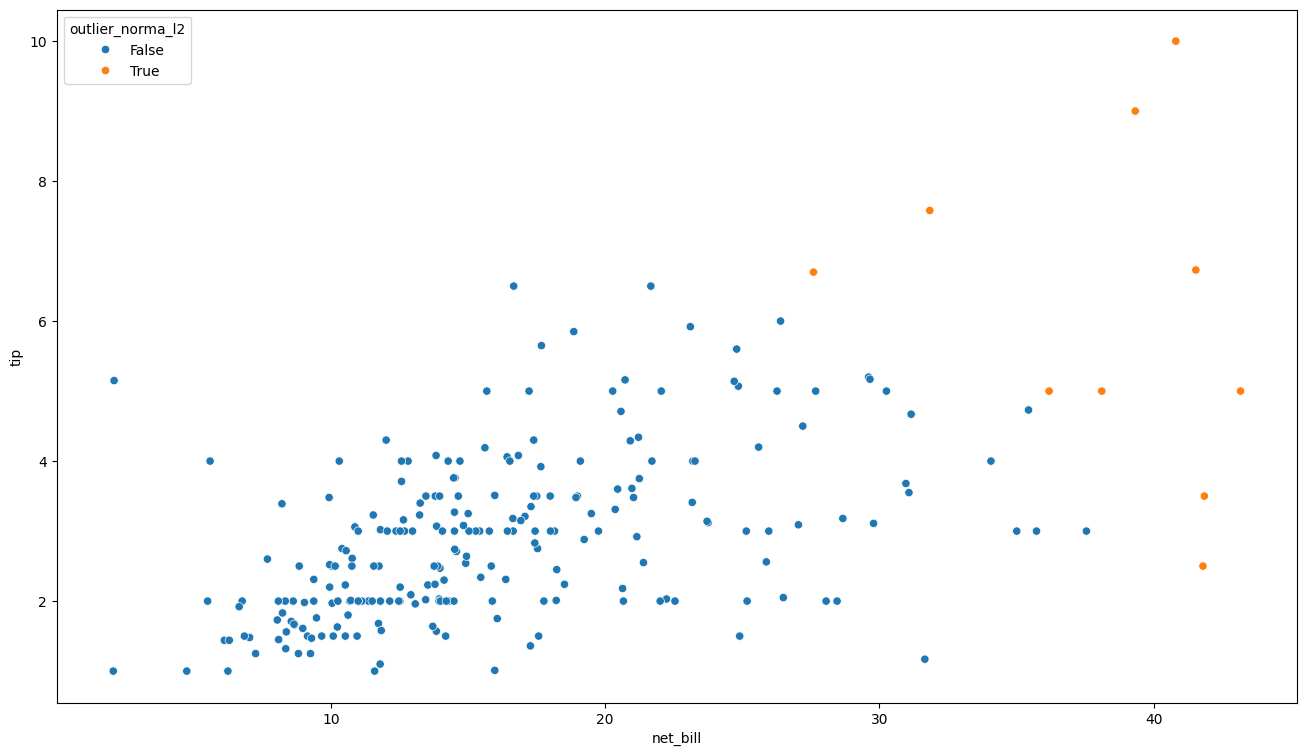

In [15]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=dataframe_tips, x='net_bill', y='tip', hue='outlier_norma_l2')
plt.show()

### Regressão linear simples

#### Regressão

In [16]:
linear_regression = smf.ols(formula='tip ~ net_bill', data=dataframe_tips)
# linear_regression = smf.ols(formula='tip ~ net_bill', data=dataframe_tips[dataframe_tips['outlier_tip'] == False])
linear_regression = linear_regression.fit()

linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           5.02e-23
Time:                        10:09:39   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
dataframe_tips.describe().loc[['min', 'max']]

,total_bill,tip,size,net_bill,tip_percentage,r_tip,tip_standard,net_bill_standard,norma_l2
min,3.07,1.0,1.0,2.07,0.036955,1.0,-1.447189,-1.836040,0.017219
max,50.81,10.0,6.0,43.17,2.452381,10.0,5.070772,3.291217,5.890125


### R² score

In [18]:
r2_score(y_true = dataframe_tips['tip'], y_pred = linear_regression.fittedvalues)

0.3325407312323706

#### Parâmetros

In [19]:
# linear_regression.params

intercept = linear_regression.params['Intercept']
slope = linear_regression.params['net_bill']

intercept, slope

(np.float64(1.3306984547679876), np.float64(0.09933366788078948))

#### Análise de resíduos

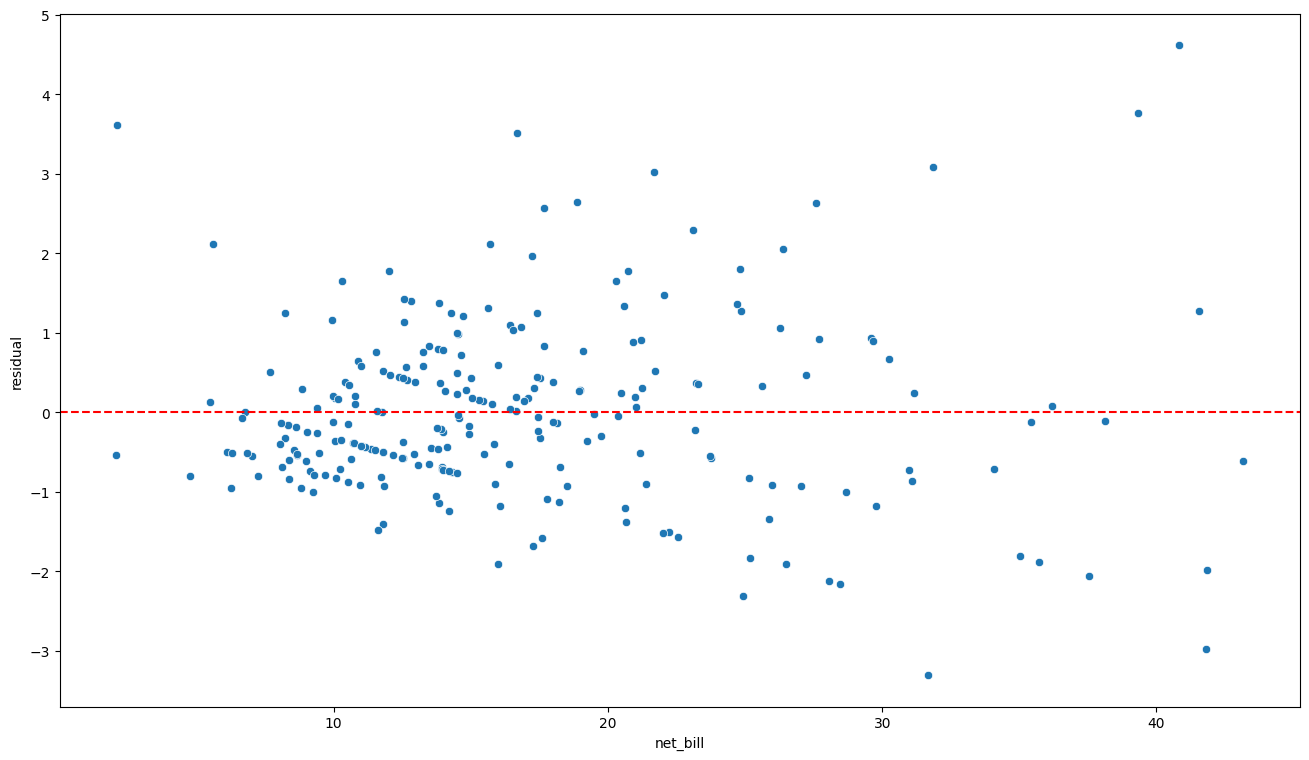

In [20]:
dataframe_tips['residual'] = linear_regression.resid

plt.figure(figsize=(16, 9))

sns.scatterplot(x='net_bill', y='residual', data=dataframe_tips)

plt.axhline(y=0, color='r', linestyle='--')

plt.show()

#### Predict

In [21]:
linear_regression.predict(dataframe_tips[0:50]).head(3)

0    2.918050
1    2.192915
2    3.070031
dtype: float64

### Transformação

In [22]:
linear_regression = smf.ols(formula='tip ~ np.power(net_bill, 1/1.15)', data=dataframe_tips)
linear_regression = linear_regression.fit()

linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     121.0
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           4.33e-23
Time:                        10:09:39   Log-Likelihood:                -375.48
No. Observations:                 244   AIC:                             755.0
Df Residuals:                     242   BIC:                             762.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.0657      0.190      5.607      0.000       0.691       1.440
np.power(net_bill, 1 / 1.15)     0.1683      0.015     11.000      0.000       0.138       0.198
==============================================================================
Omnibus:                       36.938   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.678
Skew:                           0.795   Prob(JB):                     1.22e-15
Kurtosis:                       5.055   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

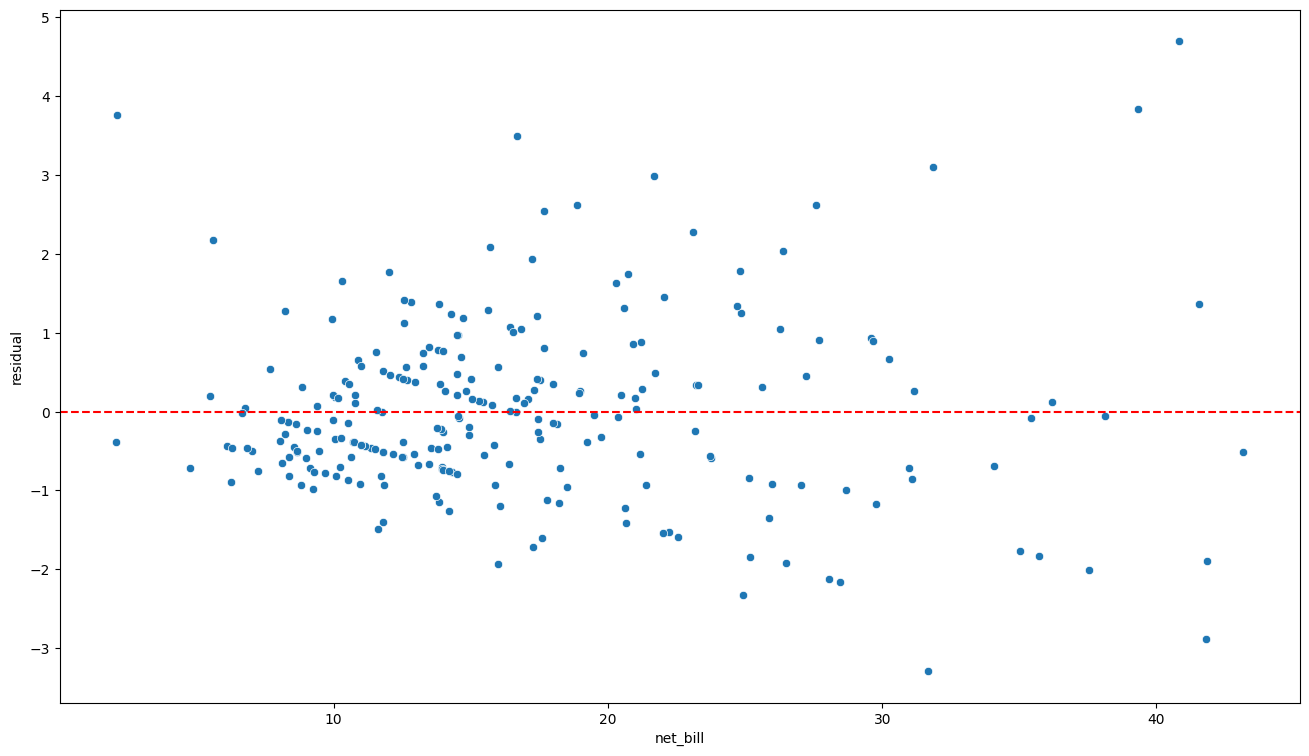

In [23]:
dataframe_tips['residual'] = linear_regression.resid

plt.figure(figsize=(16, 9))

sns.scatterplot(x='net_bill', y='residual', data=dataframe_tips)

plt.axhline(y=0, color='r', linestyle='--')

plt.show()

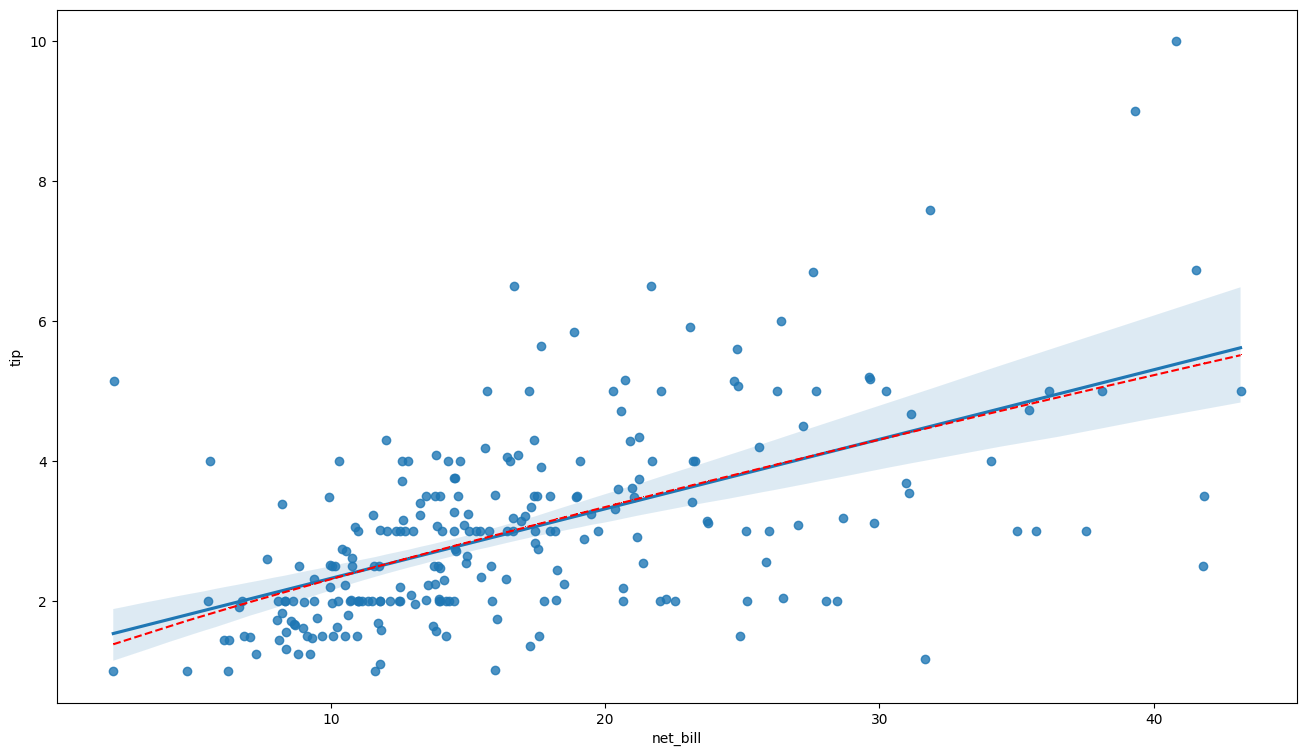

In [24]:
plt.figure(figsize=(16, 9))

dataframe_tips['tip_log_net_bill'] = linear_regression.fittedvalues

dataframe_tips = dataframe_tips.sort_values(by='net_bill')

sns.regplot(x='net_bill', y='tip', data=dataframe_tips)
plt.plot(dataframe_tips['net_bill'], dataframe_tips['tip_log_net_bill'], 'r,--')

plt.show()

#### Previsão

In [25]:
linear_regression.predict(dataframe_tips)

67     1.382571
172    1.386561
92     1.718186
149    1.808075
178    1.818608
         ...   
170    5.300380
59     5.366173
102    5.389569
182    5.394067
156    5.512541
Length: 244, dtype: float64

### Tip percentage

#### Weighted mean

In [26]:
tip_pct_values = round(number = dataframe_tips['tip_percentage'], ndigits = 2)

dataframe_tips['r_tip_percentage'] = tip_pct_values

tip_pct_values = tip_pct_values.value_counts()

tip_pct_values_max_freq = tip_pct_values.values.max()

lim = 0.0

tip_pct_values = tip_pct_values.loc[tip_pct_values.div(other = tip_pct_values_max_freq) >= lim]

tip_pct_weight_mean = sum(tip_pct_values.index * tip_pct_values.values) / sum(tip_pct_values.values)
tip_pct_weight_mean = round(number = tip_pct_weight_mean, ndigits = 2)

tip_pct_values, tip_pct_weight_mean

(tip_percentage
 0.18    21
 0.16    19
 0.17    17
 0.19    17
 0.25    14
 0.24    13
 0.21    12
 0.14    12
 0.23    10
 0.22     9
 0.15     9
 0.11     9
 0.20     8
 0.13     8
 0.26     8
 0.12     8
 0.09     7
 0.08     6
 0.29     4
 0.28     4
 0.27     3
 0.32     3
 0.06     3
 0.10     3
 0.36     2
 0.30     2
 0.39     2
 0.31     2
 0.07     2
 0.48     1
 2.45     1
 0.71     1
 0.34     1
 0.41     1
 0.35     1
 0.04     1
 Name: count, dtype: int64,
 np.float64(0.2))

#### Fences

In [27]:
q1 = dataframe_tips['tip_percentage'].quantile(q=0.25)
q3 = dataframe_tips['tip_percentage'].quantile(q=0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

#### Outlier (IQR Method)

In [28]:
dataframe_tips['outlier_tip_pct'] = False
dataframe_tips.loc[
    dataframe_tips[
        (dataframe_tips['tip_percentage'] < lower_limit) | (dataframe_tips['tip_percentage'] > upper_limit)
    ].index,
    'outlier_tip_pct'] = True

# dataframe_tips['outlier_tip_pct'] = True
# dataframe_tips.loc[
#     dataframe_tips[
#         (dataframe_tips['tip_percentage'] >= lower_limit) & (dataframe_tips['tip_percentage'] <= upper_limit)
#     ].index,
#     'outlier_tip_pct'] = False

#### Outlier (IQR Method) em net_bill

In [29]:
# q1 = dataframe_tips['net_bill'].quantile(q=0.25)
# q3 = dataframe_tips['net_bill'].quantile(q=0.75)
# iqr = q3 - q1

# lower_limit = q1 - 1.5 * iqr
# upper_limit = q3 + 1.5 * iqr

# dataframe_tips.loc[
#     dataframe_tips[
#         (dataframe_tips['net_bill'] < lower_limit) | (dataframe_tips['net_bill'] > upper_limit)
#     ].index,
#     'outlier_tip_pct'] = True

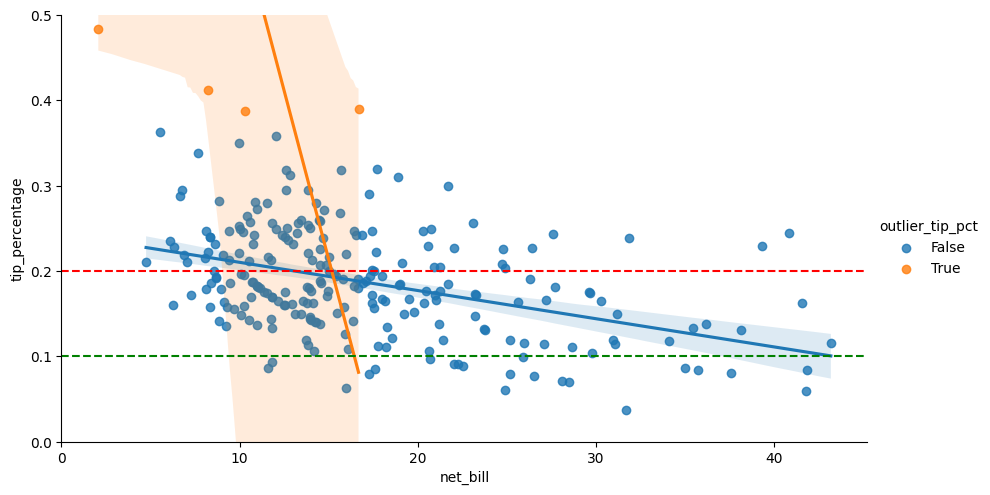

In [30]:
# scatter (net_bill x tip_percentage) with regression line
sns.lmplot(x='net_bill', y='tip_percentage', data=dataframe_tips, hue='outlier_tip_pct', legend=True, aspect=1.778)

# sns.regplot(x='net_bill', y='tip_percentage', data=dataframe_tips, scatter=False)
# sns.scatterplot(x='net_bill', y='tip_percentage', data=dataframe_tips, hue='outlier')

# 10% line
plt.axhline(y=0.1, color='g', linestyle='--')
plt.axhline(y=tip_pct_weight_mean, color='r', linestyle='--')

plt.xlim(left=0)
plt.ylim(bottom=0, top=0.5)

plt.show()

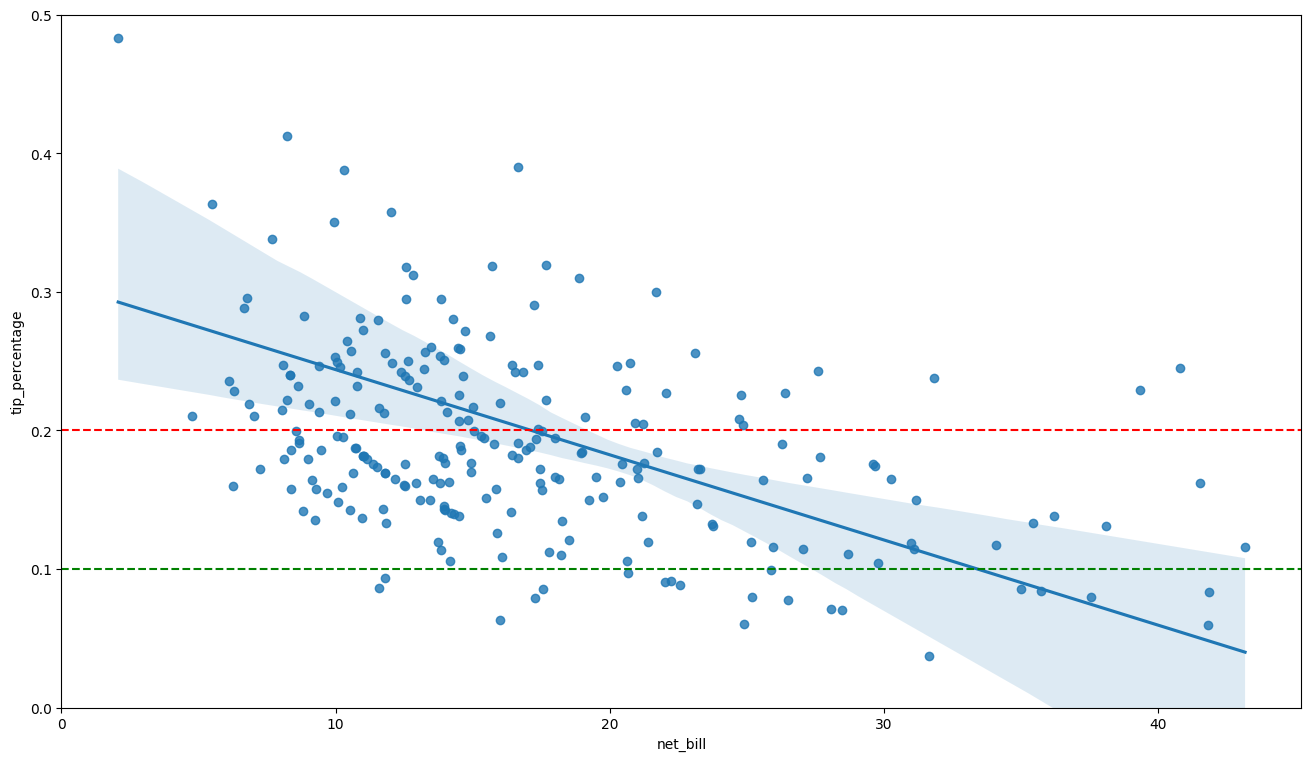

In [31]:
plt.figure(figsize=(16,9))

# scatter (net_bill x tip_percentage) with regression line
sns.regplot(x='net_bill', y='tip_percentage', data=dataframe_tips)

# 10% line
plt.axhline(y=0.1, color='g', linestyle='--')
plt.axhline(y=tip_pct_weight_mean, color='r', linestyle='--')

plt.xlim(left=0)
plt.ylim(bottom=0, top=0.5)

plt.show()

### Regressão linear simples

In [32]:
# dataframe_tips = dataframe_tips[dataframe_tips['tip_percentage'] < 0.50]
dataframe_tips = dataframe_tips[dataframe_tips['outlier_tip_pct'] == False]

#### Regressão pela porcentagem da gorjeta

In [33]:
linear_regression = smf.ols(formula='tip_percentage ~ net_bill', data=dataframe_tips)
# linear_regression = smf.ols(formula='tip_percentage ~ net_bill', data=dataframe_tips[dataframe_tips['outlier_tip_pct'] == False])
linear_regression = linear_regression.fit()

linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tip_percentage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     51.65
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           8.68e-12
Time:                        10:09:40   Log-Likelihood:                 347.93
No. Observations:                 238   AIC:                            -691.9
Df Residuals:                     236   BIC:                            -684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2432      0.009     28.144      0.000       0.226       0.260
net_bill      -0.0033      0.000     -7.186      0.000      -0.004      -0.002
==============================================================================
Omnibus:                        6.625   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.840
Skew:                           0.408   Prob(JB):                       0.0327
Kurtosis:                       2.846   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 score

In [34]:
r2_score(y_true = dataframe_tips['tip_percentage'], y_pred = linear_regression.fittedvalues)

0.1795463998119895

In [35]:
tip_percentage_predict = dataframe_tips['net_bill'] * linear_regression.fittedvalues

r2_score(y_true = dataframe_tips['tip'], y_pred = tip_percentage_predict)

0.37468130566884805

#### Parâmetros

In [36]:
# linear_regression.params

intercept = linear_regression.params['Intercept']
slope = linear_regression.params['net_bill']

intercept, slope

(np.float64(0.24315428513691376), np.float64(-0.003305831276502306))

#### Análise de resíduos

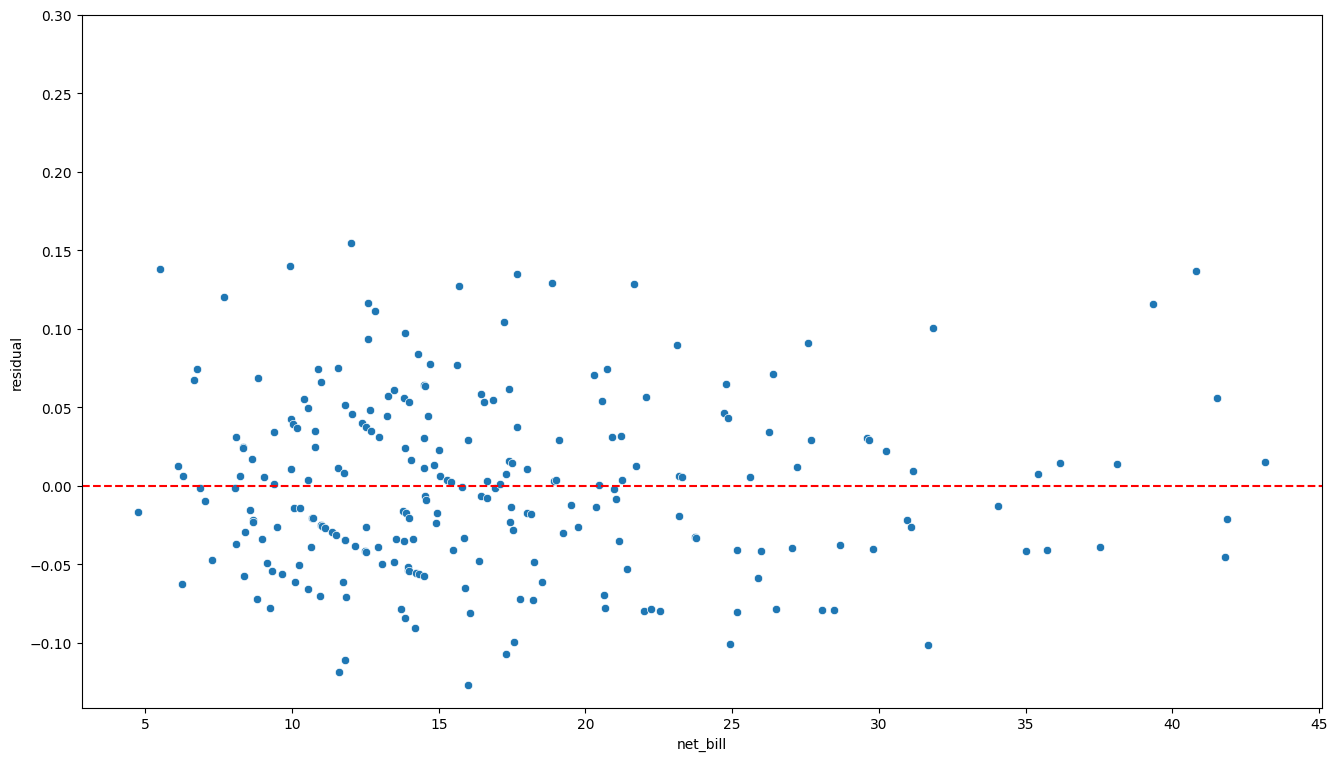

In [37]:
dataframe_tips['residual'] = linear_regression.resid

plt.figure(figsize=(16, 9))

sns.scatterplot(x='net_bill', y='residual', data=dataframe_tips)

plt.axhline(y=0, color='r', linestyle='--')

plt.ylim(top=0.3)

plt.show()